<p style="font-size:200%;font-weight:bold">Product Similarity</p>

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px #数据可视化
from itertools import combinations
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

%matplotlib inline   
#可以逐行输出图片

DB = "/home/data/"
ROOT = "/home/team_crypto/2022_esg_peer/"

RD = f"{ROOT}02_rdata/"
WD = f"{ROOT}03_wdata/"

# Read TNIC

In [9]:
df = pd.read_parquet(f'{DB}tnic/tnic3_data.pq')
df.shape
df.sample(3)

(23678297, 4)

,year,gvkey1,gvkey2,score
21356928,2016,19511,61140,0.1224
18288518,2010,19932,1447,0.0885
14774397,2004,66281,149621,0.0133


<AxesSubplot:>

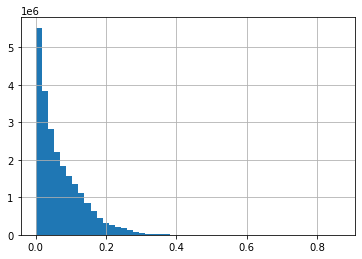

In [10]:
df['score'].hist(bins=50)

In [11]:
gks = set(df['gvkey1']) | set(df['gvkey2'])
#检查总共有多少家公司
len(gks)

17745

In [12]:
gks = ''.join([str(x) + '\n' for x in gks]) #'\n'换行

In [14]:
# with open(f'{WD}1300_tnic_gvkeys.txt', 'w') as f:
#     f.write(gks)

In [15]:
cp = pd.read_csv(f'{RD}comp_tnic_ind.csv', engine='pyarrow')
cp.shape
cp.sample(3)

(227098, 15)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,conm,curcd,costat,naicsh,sich,gsubind,naics,sic
29485,6097,20020930,2002,INDL,C,D,STD,INTL GAME TECHNOLOGY,USD,I,713210.0,7990.0,25301010.0,713210,7990
196201,132502,20090531,2008,INDL,C,D,STD,PALM INC,USD,I,334111.0,3571.0,45201020.0,334111,3571
220523,179782,20131231,2013,INDL,C,D,STD,RESOLUTE ENERGY CORP,USD,I,211111.0,1311.0,10102020.0,211111,1311
